In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PLOT_COLORS = ['#268BD2', "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style = 'ticks')
plt.rc('figure', figsize = (8,5), dpi = 100)
plt.rc('axes', labelpad = 20, facecolor = "#ffffff", linewidth = 0.4, grid = True, labelsize = 14)
plt.rc('patch', linewidth = 0)
plt.rc('xtick.major', width = 0.2)
plt.rc('ytick.major', width = 0.2)
plt.rc('grid', color ='#9E9E9E', linewidth = 0.4)
plt.rc('font', family = 'Arial', weight = '400', size = 10)
plt.rc('text', color = '#282828')
plt.rc('savefig', pad_inches = 0.3, dpi = 300)

In [6]:
path = r'..\dataset_for_Data_analysis_visualization\vgsales.csv'

df = pd.read_csv(path)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## DATA CLEANING

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [21]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [63]:
df['cdf'] = df['Publisher'].isnull()

In [64]:
df[df['cdf'].apply(lambda x: x == True)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cdf


In [65]:
df[df['Publisher'].apply(lambda x: x == 'NaN')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,cdf


In [66]:
df.dropna(subset = ['Year'], inplace = True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [68]:
df.dropna(subset = ['Publisher'], inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 12 columns):
Rank            16291 non-null int64
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
cdf             16291 non-null bool
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [71]:
df.drop(['cdf'], axis = 1, inplace = True)

In [72]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [73]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.00,0.18,-0.40,-0.38,-0.27,-0.33,-0.43
Year,0.18,1.00,-0.09,0.01,-0.17,0.04,-0.07
NA_Sales,-0.40,-0.09,1.00,0.77,0.45,0.63,0.94
EU_Sales,-0.38,0.01,0.77,1.00,0.44,0.73,0.90
JP_Sales,-0.27,-0.17,0.45,0.44,1.00,0.29,0.61
Other_Sales,-0.33,0.04,0.63,0.73,0.29,1.00,0.75
Global_Sales,-0.43,-0.07,0.94,0.90,0.61,0.75,1.00


In [74]:
df.describe(include = 'all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.00,16291,16291,16291.00,16291,16291,16291.00,16291.00,16291.00,16291.00,16291.00
unique,nan,11325,31,nan,12,576,nan,nan,nan,nan,nan
top,nan,Need for Speed: Most Wanted,DS,nan,Action,Electronic Arts,nan,nan,nan,nan,nan
freq,nan,12,2131,nan,3251,1339,nan,nan,nan,nan,nan
mean,8290.19,NaN,NaN,2006.41,NaN,NaN,0.27,0.15,0.08,0.05,0.54
std,4792.65,NaN,NaN,5.83,NaN,NaN,0.82,0.51,0.31,0.19,1.57
min,1.00,NaN,NaN,1980.00,NaN,NaN,0.00,0.00,0.00,0.00,0.01
25%,4132.50,NaN,NaN,2003.00,NaN,NaN,0.00,0.00,0.00,0.00,0.06
50%,8292.00,NaN,NaN,2007.00,NaN,NaN,0.08,0.02,0.00,0.01,0.17
75%,12439.50,NaN,NaN,2010.00,NaN,NaN,0.24,0.11,0.04,0.04,0.48


In [75]:
df[df['Name'].apply(lambda x: x == 'Need for Speed: Most Wanted')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.00,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.00,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.00,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.00,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.00,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.00,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.00,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.00,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.00,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.00,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


## DATA ANALYSIS

In [76]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [82]:
df1 = df['Platform'].value_counts().to_frame().reset_index().rename(columns ={'index': 'Platform Name', 'Platform': 'No'})
df1

,Platform Name,No
0,DS,2131
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1234
5,PSP,1197
6,PS,1189
7,PC,938
8,XB,803
9,GBA,786


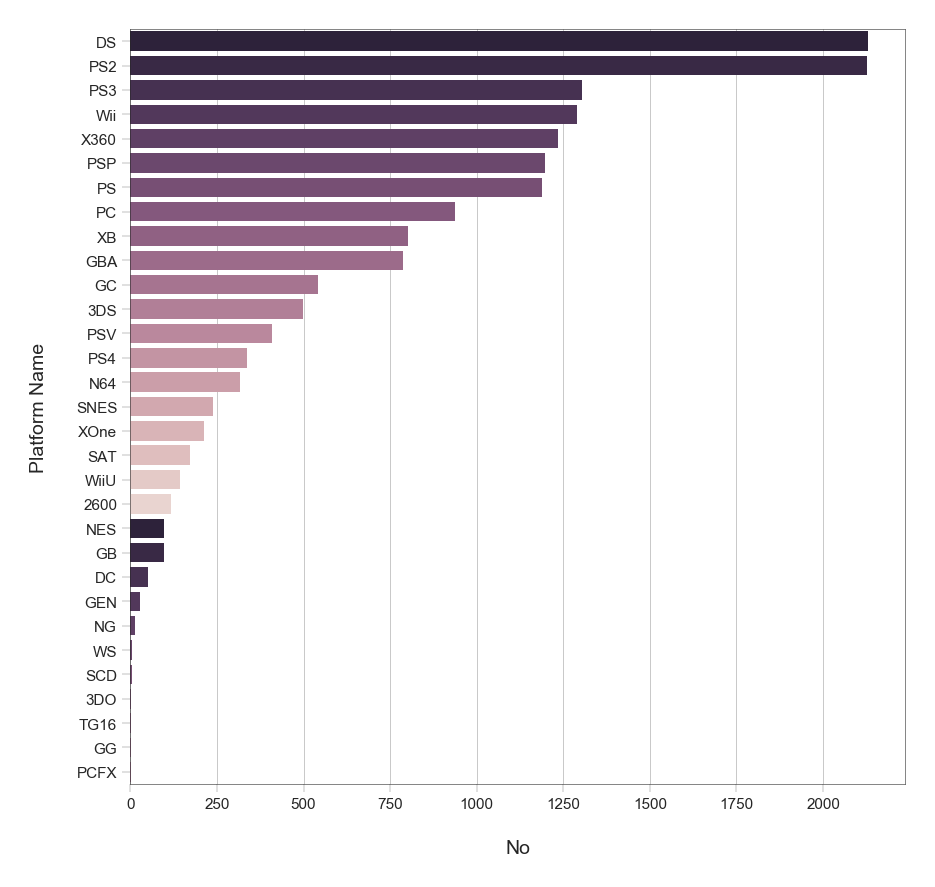

In [86]:
fig,ax = plt.subplots(figsize = (10,10))
sns.barplot(y = 'Platform Name', x = 'No', data = df1, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax )

### we can see that DS and PS2 are the most common type of platform from the data set.why? is it because majority of apps are not of recent year?

In [90]:
df2 = df['Year'].value_counts().to_frame().reset_index().rename(columns ={'index': 'Year', 'Year': 'No'})
df2

,Year,No
0,2009.00,1431
1,2008.00,1428
2,2010.00,1257
3,2007.00,1201
4,2011.00,1136
5,2006.00,1008
6,2005.00,936
7,2002.00,829
8,2003.00,775
9,2004.00,744


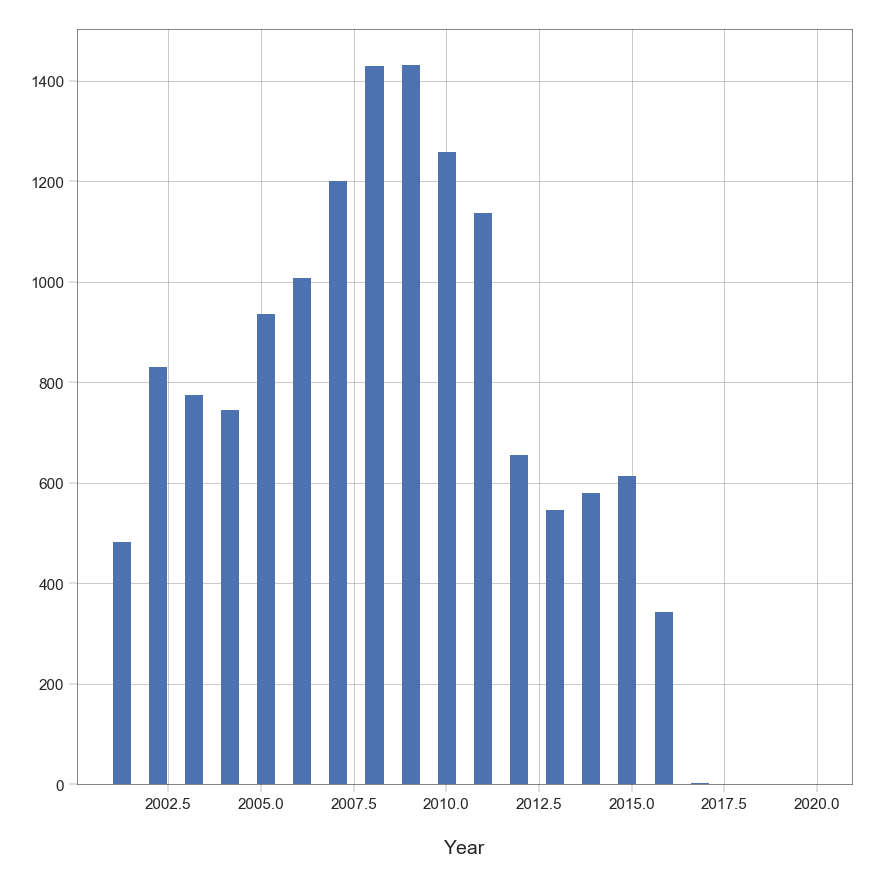

In [98]:
fig,ax = plt.subplots(figsize = (10,10))
sns.distplot(df[df['Year'] > 2000]['Year'] , kde = False, hist_kws = {'alpha': 1}, ax = ax)

In [100]:
df[df['Year'] >= 2000]['Year'].count()/df['Year'].count() * 100

87.88288011785649

###  WE notice that 87.9% of the apps where published in year 2000 and above

In [139]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [140]:
df.describe(include = 'all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.00,16291,16291,16291.00,16291,16291,16291.00,16291.00,16291.00,16291.00,16291.00
unique,nan,11325,31,nan,12,576,nan,nan,nan,nan,nan
top,nan,Need for Speed: Most Wanted,DS,nan,Action,Electronic Arts,nan,nan,nan,nan,nan
freq,nan,12,2131,nan,3251,1339,nan,nan,nan,nan,nan
mean,8290.19,NaN,NaN,2006.41,NaN,NaN,0.27,0.15,0.08,0.05,0.54
std,4792.65,NaN,NaN,5.83,NaN,NaN,0.82,0.51,0.31,0.19,1.57
min,1.00,NaN,NaN,1980.00,NaN,NaN,0.00,0.00,0.00,0.00,0.01
25%,4132.50,NaN,NaN,2003.00,NaN,NaN,0.00,0.00,0.00,0.00,0.06
50%,8292.00,NaN,NaN,2007.00,NaN,NaN,0.08,0.02,0.00,0.01,0.17
75%,12439.50,NaN,NaN,2010.00,NaN,NaN,0.24,0.11,0.04,0.04,0.48


In [141]:
df3 = df['Genre'].value_counts().to_frame().reset_index().rename(columns ={'index': 'Genre', 'Genre': 'No'})
df3


,Genre,No
0,Action,3251
1,Sports,2304
2,Misc,1686
3,Role-Playing,1470
4,Shooter,1282
5,Adventure,1274
6,Racing,1225
7,Platform,875
8,Simulation,848
9,Fighting,836


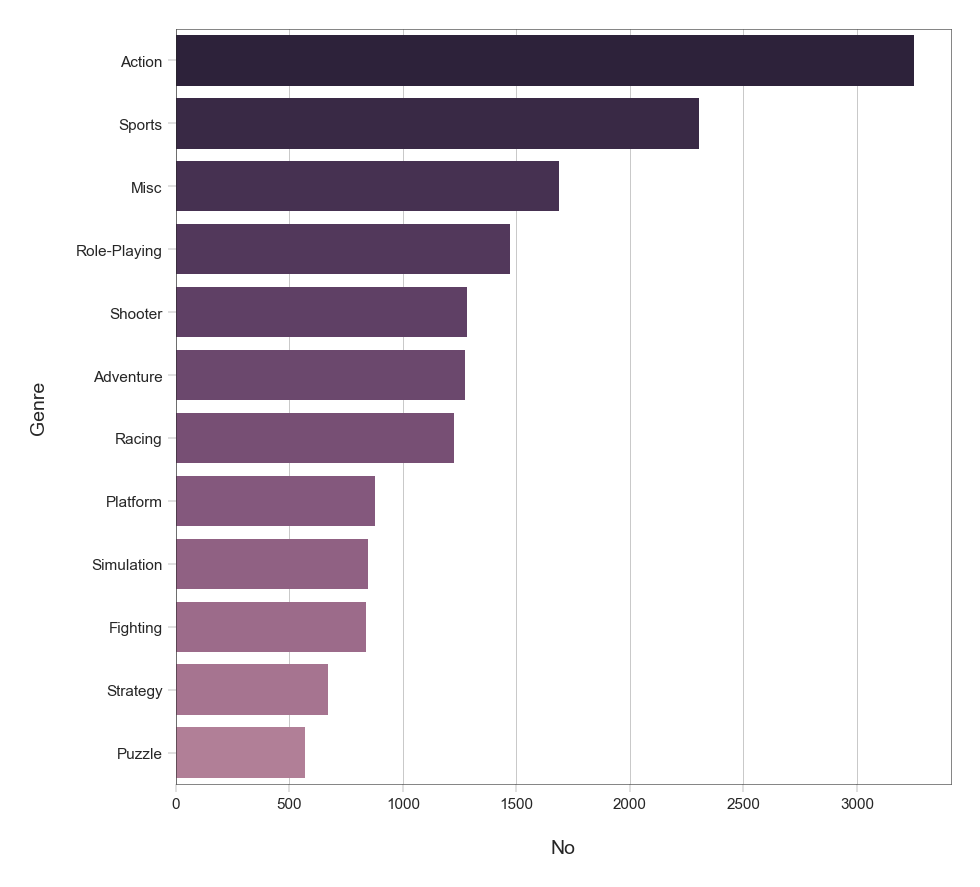

In [144]:
fig,ax = plt.subplots(figsize = (10,10))
sns.barplot(y = 'Genre', x = 'No', data = df3, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax )

### The most popular Genre is Action

In [145]:
df4 = df[['Genre', 'Rank']]

In [153]:
df4g = df4.groupby(['Genre'], as_index = False).mean()
df4g = df4g.sort_values('Rank', ascending = False)
df4g

,Genre,Rank
1,Adventure,11541.85
11,Strategy,10071.94
5,Puzzle,9643.48
9,Simulation,8572.35
3,Misc,8567.70
7,Role-Playing,8054.59
0,Action,7983.94
6,Racing,7917.82
2,Fighting,7621.75
10,Sports,7424.13


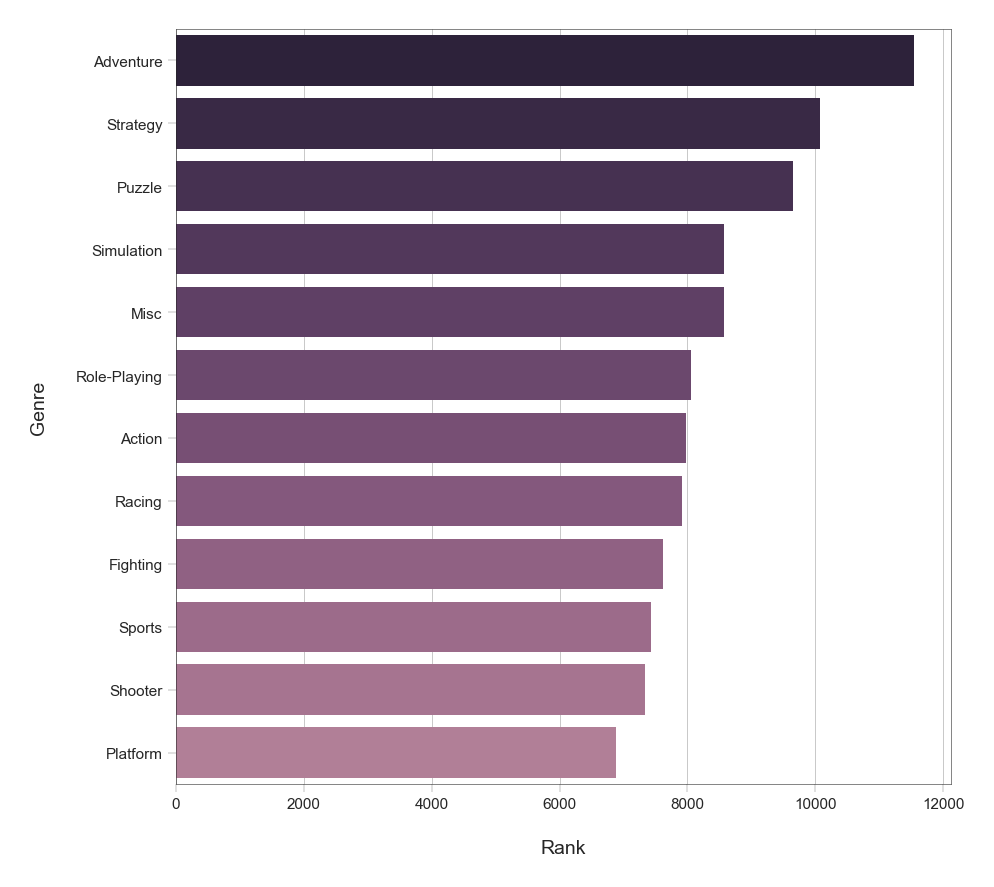

In [152]:
fig,ax = plt.subplots(figsize = (10,10))
sns.barplot(y = 'Genre', x = 'Rank', data = df4g, palette = sns.cubehelix_palette(n_colors = 20, reverse = True), ax = ax )

####  On average platform Genre are ranked best overall, while adventure are ranked least overall

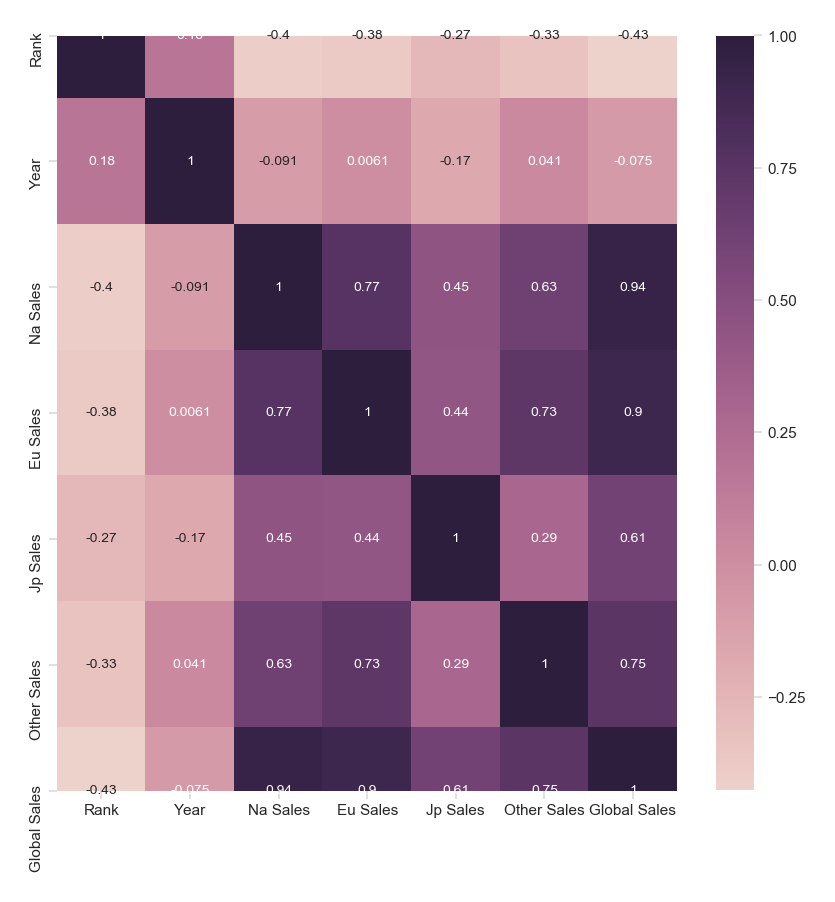

In [161]:
h_labels = [x.replace('_', ' ').title() for x in list(df.select_dtypes(include = ['number', 'bool']).columns.values)]
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, xticklabels=h_labels, yticklabels= h_labels, cmap = sns.cubehelix_palette(as_cmap = True), ax = ax)

####  we can see that global sales with Eu sales and Na sales are highly correlated, let's check it out by using scatter plot

[Text(0, 0.5, 'Na_Sales'), Text(0.5, 0, 'Global_Sales')]

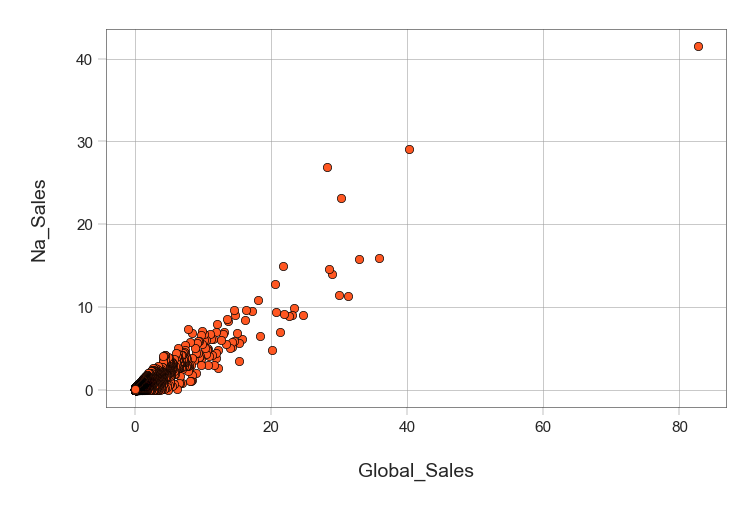

In [166]:
fig,ax = plt.subplots()
ax.scatter(x = df['Global_Sales'], y = df['NA_Sales'], color = PLOT_COLORS[2], edgecolors = '#000000', linewidths = 0.5)
ax.set(xlabel = 'Global_Sales', ylabel = 'Na_Sales')

#### we can see that they are truly positively correlated. As one increases the other one also increases

[Text(0, 0.5, 'EU_Sales'), Text(0.5, 0, 'Global_Sales')]

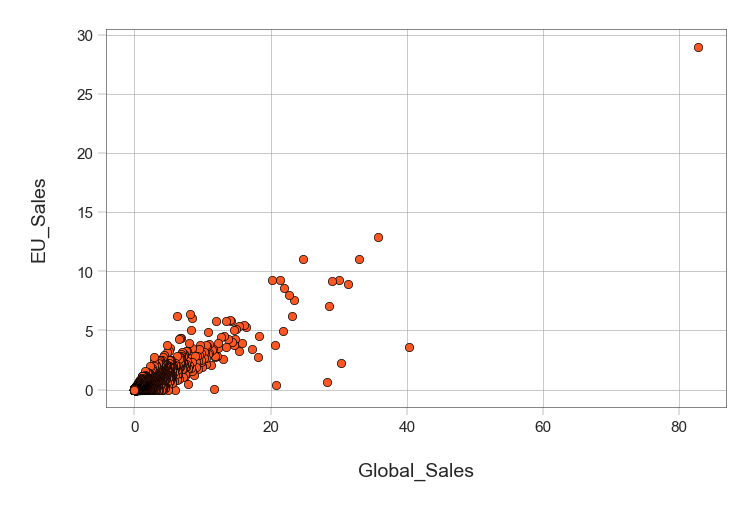

In [167]:
fig,ax = plt.subplots()
ax.scatter(x = df['Global_Sales'], y = df['EU_Sales'], color = PLOT_COLORS[2], edgecolors = '#000000', linewidths = 0.5)
ax.set(xlabel = 'Global_Sales', ylabel = 'EU_Sales')

#### we can see that they are truly positively correlated. As one increases the other one also increases

[Text(0, 0.5, 'EU_Sales'), Text(0.5, 0, 'NA_Sales')]

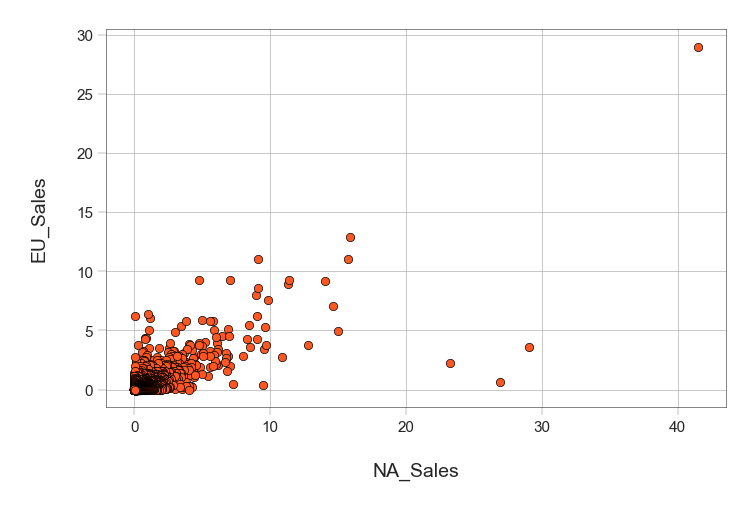

In [168]:
fig,ax = plt.subplots()
ax.scatter(x = df['NA_Sales'], y = df['EU_Sales'], color = PLOT_COLORS[2], edgecolors = '#000000', linewidths = 0.5)
ax.set(xlabel = 'NA_Sales', ylabel = 'EU_Sales')

####  from this scatter plot we can see that they are slighly positively correlated. As one increases the other one also increases

### CONCLUSION

#### we derived from the dataset analysis that DC and PS2 were the most common platform for the games. 87.9% of the apps where published in year 2000 and beyond. The most common Genre was Action, On average ranking platform is the best ranked Genre while the worst ranked Genre was Adventure. Global sales is highly positively related to both EU sales and NA sales.